In [1]:
#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [5]:
df = pd.DataFrame(pd.read_csv("/content/drive/MyDrive/lung_cancer_prediction/survey lung cancer.csv"))
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [6]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
df.columns


Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [8]:
df.shape

(309, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [11]:
#checking duplicates
sum(df.duplicated(subset = 'AGE')) == 0
# No duplicate values

False

In [12]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

GENDER                   0.0
AGE                      0.0
SMOKING                  0.0
YELLOW_FINGERS           0.0
ANXIETY                  0.0
PEER_PRESSURE            0.0
CHRONIC DISEASE          0.0
FATIGUE                  0.0
ALLERGY                  0.0
WHEEZING                 0.0
ALCOHOL CONSUMING        0.0
COUGHING                 0.0
SHORTNESS OF BREATH      0.0
SWALLOWING DIFFICULTY    0.0
CHEST PAIN               0.0
LUNG_CANCER              0.0
dtype: float64

In this dataset, GENDER & LUNG_CANCER attributes are in object data type. So, let's convert them to numerical values using LabelEncoder from sklearn. LabelEncoder is a utility class to help normalize labels such that they contain only values between 0 and n_classes-1. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Also let's make every other attributes as YES=1 & NO=0.

In [15]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [16]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


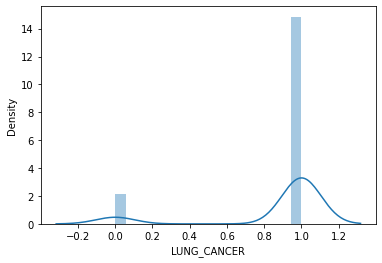

In [18]:
sns.distplot(df['LUNG_CANCER'])

In [19]:
df['LUNG_CANCER'].value_counts()

1    270
0     39
Name: LUNG_CANCER, dtype: int64

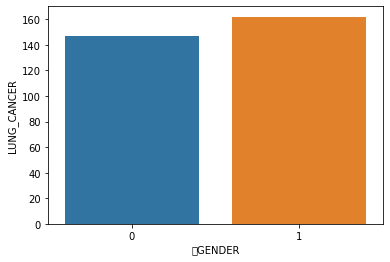

<Figure size 432x288 with 0 Axes>

In [21]:
plt1 = sns.countplot(df['GENDER'])
plt1.set(xlabel = '	GENDER', ylabel= 'LUNG_CANCER')
plt.show()
plt.tight_layout()

In [22]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5))

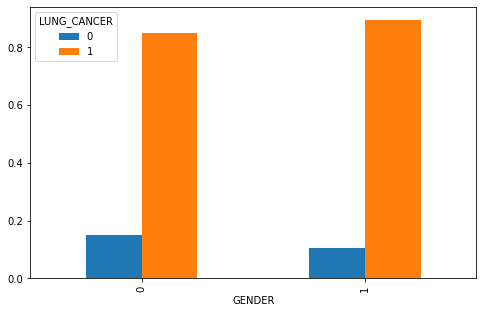

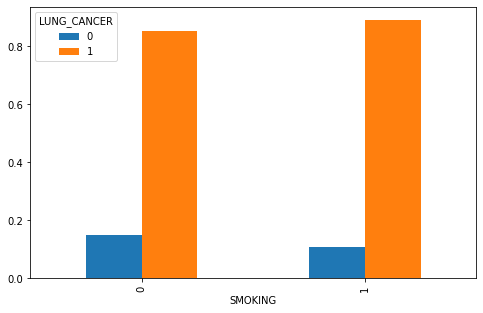

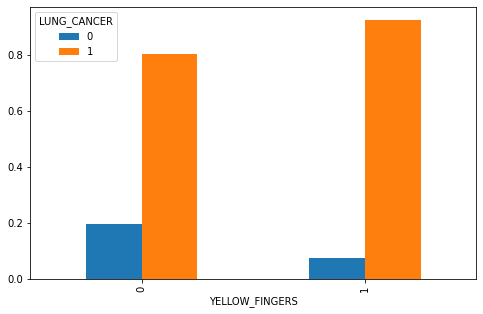

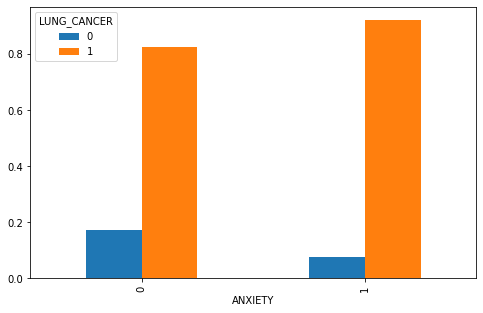

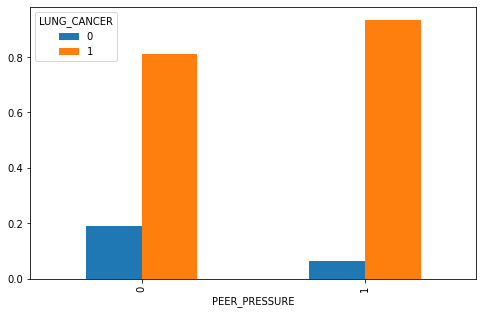

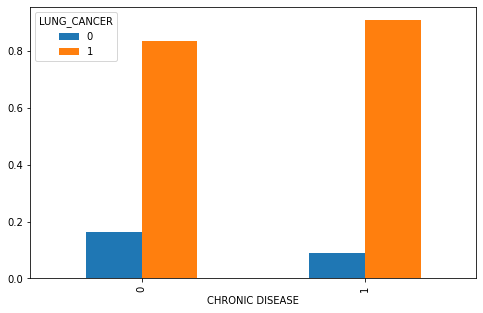

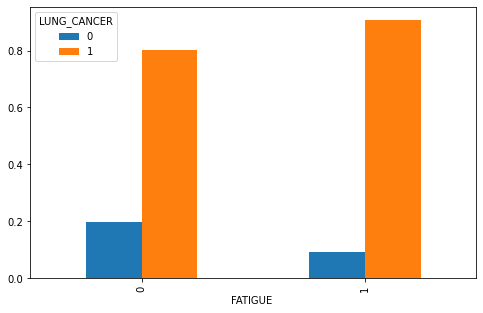

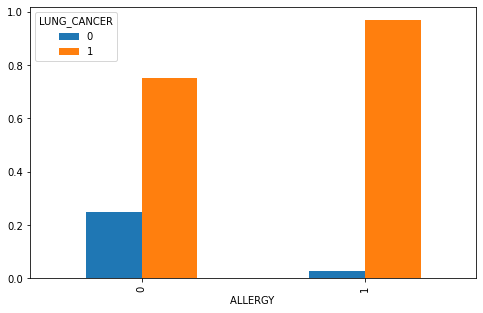

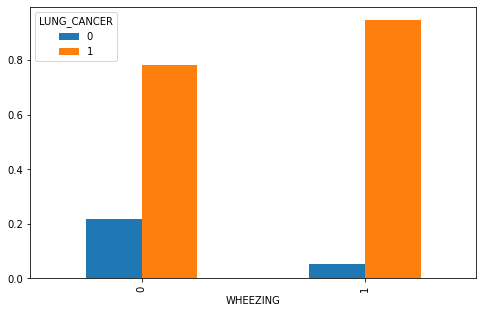

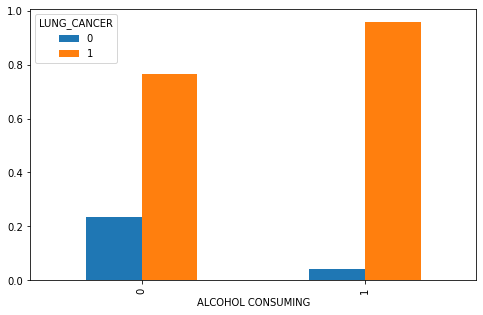

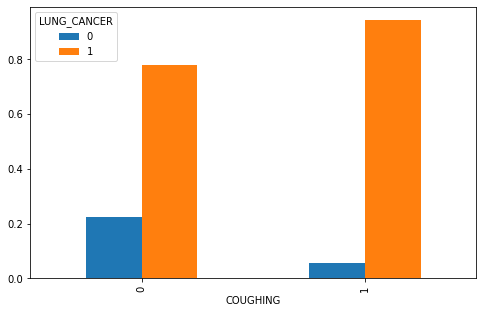

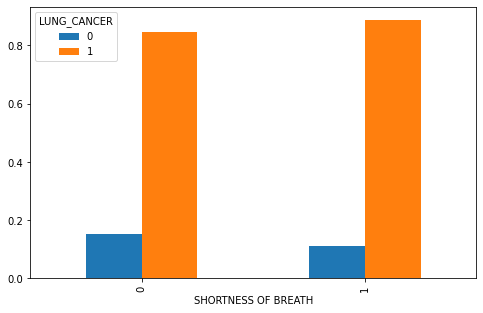

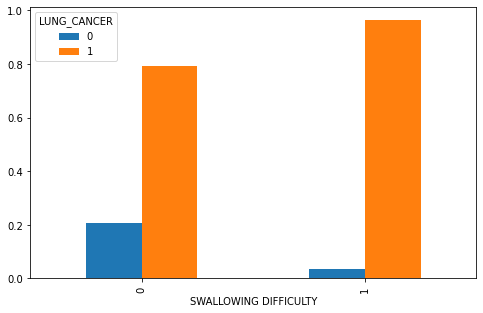

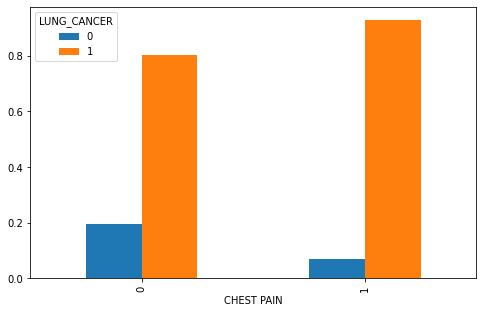

In [47]:
plot('GENDER')
plot('SMOKING')
plot('YELLOW_FINGERS')
plot('ANXIETY')
plot('PEER_PRESSURE')
plot('CHRONIC DISEASE')
plot('FATIGUE ')
plot('ALLERGY ')
plot('WHEEZING')
plot('ALCOHOL CONSUMING')
plot('COUGHING')
plot('SHORTNESS OF BREATH')
plot('SWALLOWING DIFFICULTY')
plot('CHEST PAIN')

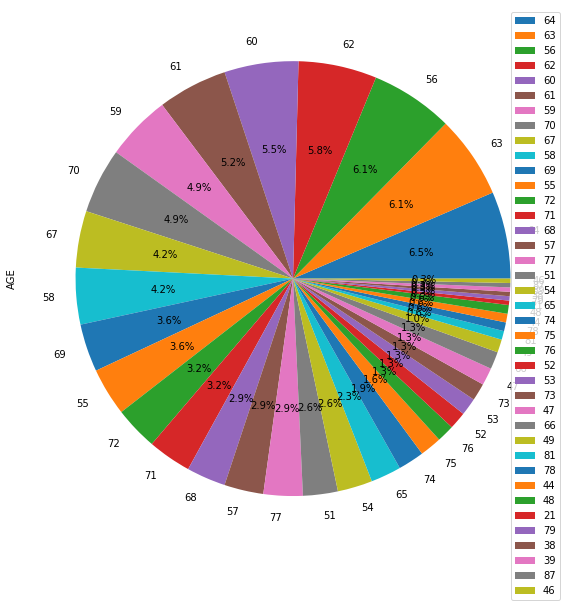

<Figure size 432x288 with 0 Axes>

In [37]:
df_sym = pd.DataFrame(df['AGE'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,10))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

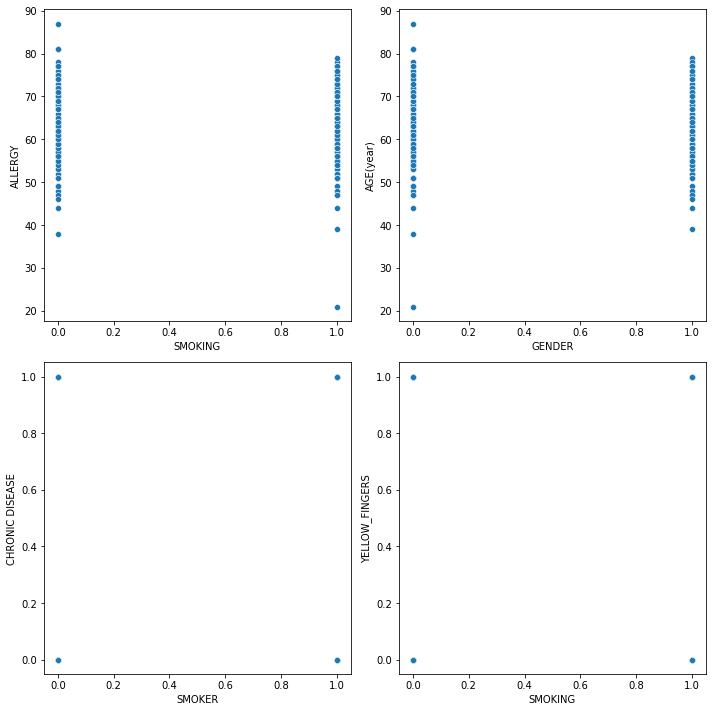

In [49]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
plt1 = sns.scatterplot(x = 'SMOKING', y = 'AGE', data = df, ax = axs[0,0])
plt1.set_xlabel('SMOKING')
plt1.set_ylabel('ALLERGY')
plt2 = sns.scatterplot(x = 'GENDER', y = 'AGE', data = df, ax = axs[0,1])
plt2.set_xlabel('GENDER')
plt2.set_ylabel('AGE(year)')
plt3 = sns.scatterplot(x = 'SMOKING', y = 'CHRONIC DISEASE', data = df, ax = axs[1,0])
plt3.set_xlabel('SMOKER')
plt3.set_ylabel('CHRONIC DISEASE')
plt3 = sns.scatterplot(x = 'SMOKING', y = 'YELLOW_FINGERS', data = df, ax = axs[1,1])
plt3.set_xlabel('SMOKING')
plt3.set_ylabel('YELLOW_FINGERS')
plt.tight_layout()

In [54]:
auto=df[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']]

In [55]:
auto

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1
305,1,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1
306,1,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1
307,1,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1


<Figure size 1080x1080 with 0 Axes>

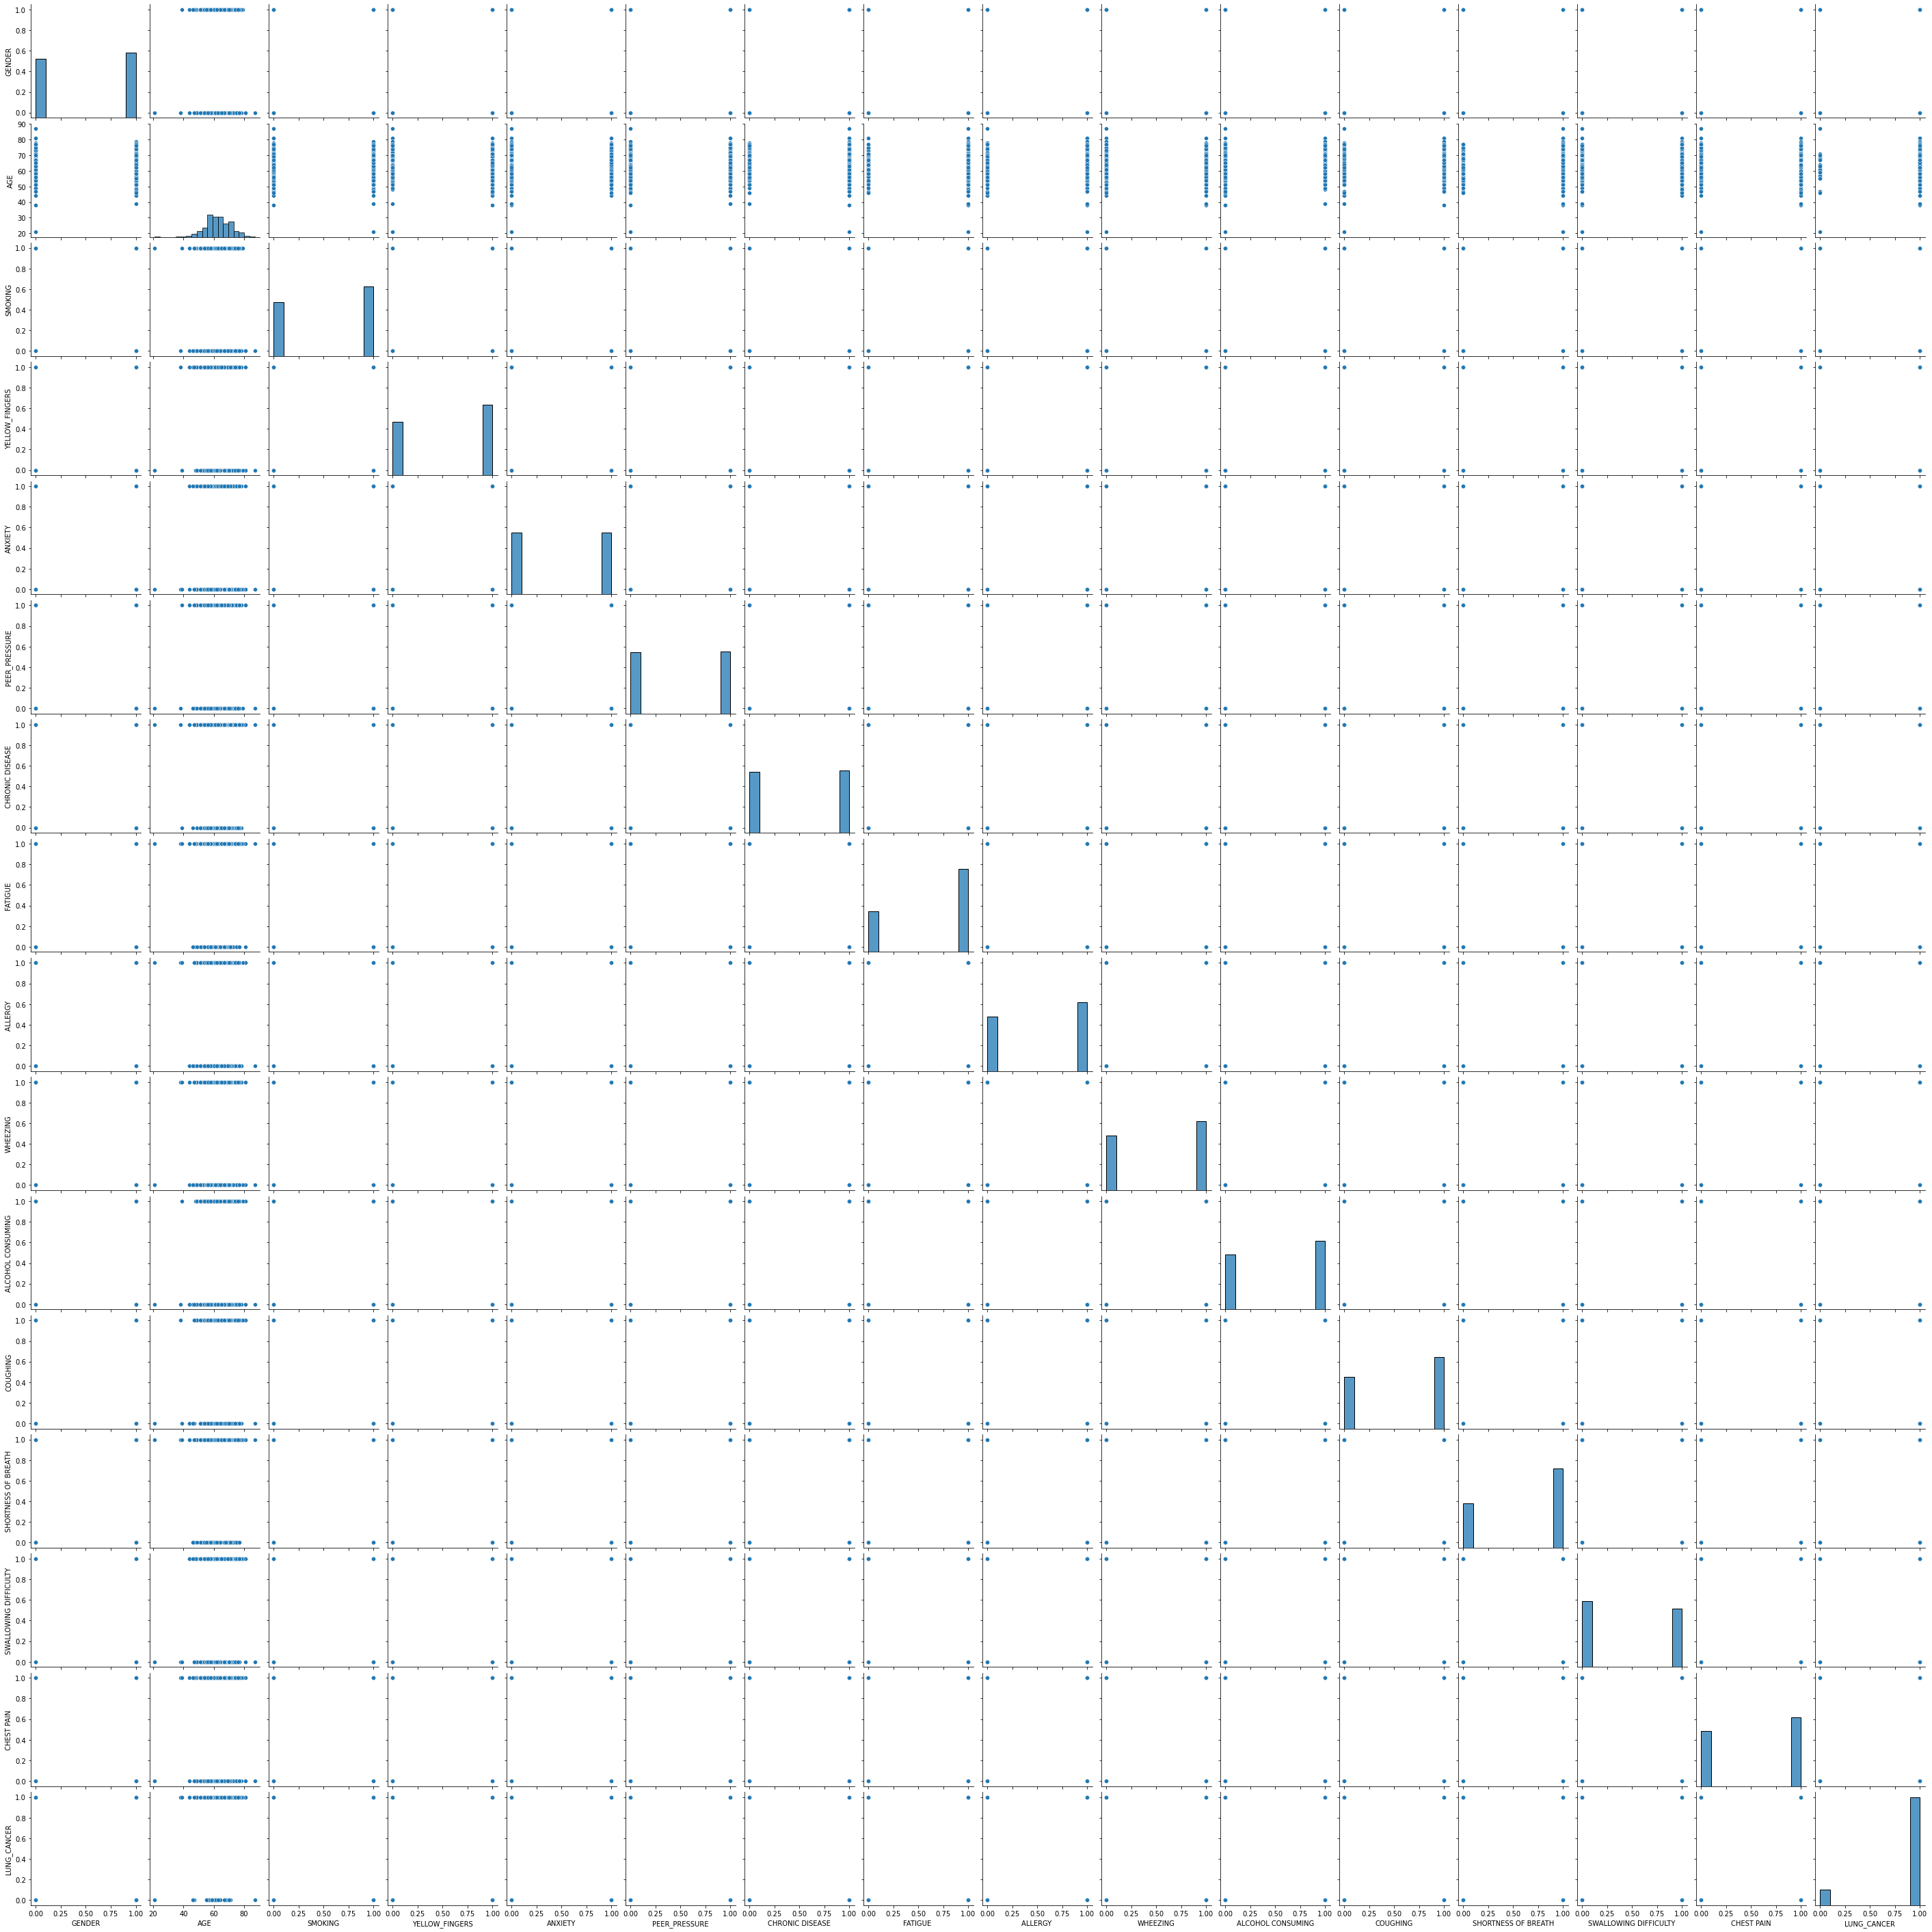

In [76]:
plt.figure(figsize=(15, 15))
sns.pairplot(auto)
plt.show()

In [63]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [67]:
df_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
110,1,58,0,1,1,0,0,1,0,1,1,1,1,1,1,1
52,0,54,1,0,0,1,0,1,1,1,1,1,0,1,1,1
26,0,61,1,1,1,0,0,1,1,0,1,0,1,1,1,1
217,0,56,1,1,1,1,1,0,1,1,1,0,0,1,1,1
249,1,68,1,0,1,0,0,1,0,0,0,0,0,0,0,0


In [77]:
df_train.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.00000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.513889,62.833333,0.569444,0.541667,0.476852,0.467593,0.50463,0.657407,0.564815,0.560185,0.560185,0.574074,0.652778,0.449074,0.564815
std,0.500968,8.344891,0.496304,0.499418,0.500624,0.500108,0.50114,0.475679,0.496933,0.497518,0.497518,0.495631,0.477193,0.498555,0.496933
min,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,57.750000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,63.000000,1.000000,1.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,87.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


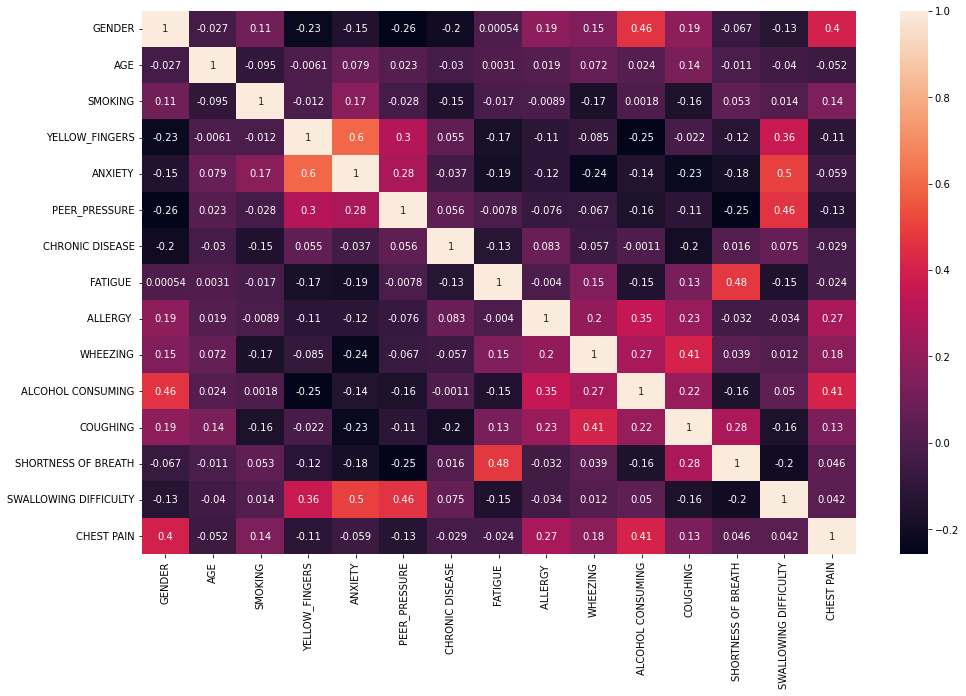

In [78]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True,)
plt.show()

In [80]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [81]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

#rfe = RFE(lm, 10)
rfe = RFE(lm, n_features_to_select=10)
#running RFE
rfe = rfe.fit(X_train, y_train)

In [82]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('GENDER', False, 5),
 ('AGE', False, 6),
 ('SMOKING', False, 4),
 ('YELLOW_FINGERS', True, 1),
 ('ANXIETY', True, 1),
 ('PEER_PRESSURE', True, 1),
 ('CHRONIC DISEASE', True, 1),
 ('FATIGUE ', True, 1),
 ('ALLERGY ', True, 1),
 ('WHEEZING', True, 1),
 ('ALCOHOL CONSUMING', True, 1),
 ('COUGHING', True, 1),
 ('SHORTNESS OF BREATH', False, 2),
 ('SWALLOWING DIFFICULTY', True, 1),
 ('CHEST PAIN', False, 3)]

In [83]:
col = X_train.columns[rfe.support_]
col

Index(['YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
       'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING',
       'SWALLOWING DIFFICULTY'],
      dtype='object')

In [84]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [85]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [86]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [87]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            LUNG_CANCER   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     13.72
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           2.16e-18
Time:                        08:24:20   Log-Likelihood:                -21.806
No. Observations:                 216   AIC:                             65.61
Df Residuals:                     205   BIC:                             102.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [88]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.79
2,ANXIETY,2.06
1,YELLOW_FINGERS,1.84
10,SWALLOWING DIFFICULTY,1.72
8,ALCOHOL CONSUMING,1.42
9,COUGHING,1.41
3,PEER_PRESSURE,1.35
7,WHEEZING,1.35
6,ALLERGY,1.20
5,FATIGUE,1.15


In [90]:
# Dropping male as p-value is high.
X_train_new1 = X_train_rfe.drop(["WHEEZING"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:            LUNG_CANCER   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     14.97
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           1.29e-18
Time:                        08:29:43   Log-Likelihood:                -22.781
No. Observations:                 216   AIC:                             65.56
Df Residuals:                     206   BIC:                             99.32
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [92]:
# Dropping northwest as p value is high.
X_train_new2 = X_train_new1.drop(["SWALLOWING DIFFICULTY"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            LUNG_CANCER   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     16.30
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           1.30e-18
Time:                        08:30:42   Log-Likelihood:                -24.383
No. Observations:                 216   AIC:                             66.77
Df Residuals:                     207   BIC:                             97.14
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2055      0.06

In [93]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,11.61
1,YELLOW_FINGERS,1.82
2,ANXIETY,1.76
7,ALCOHOL CONSUMING,1.31
8,COUGHING,1.27
6,ALLERGY,1.19
3,PEER_PRESSURE,1.14
5,FATIGUE,1.13
4,CHRONIC DISEASE,1.10


In [95]:
y_train_predition= lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

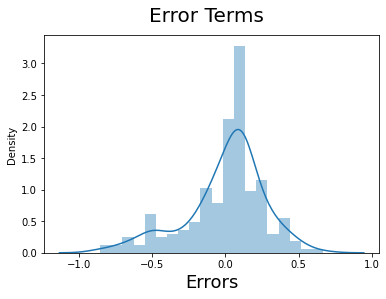

In [96]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predition), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

**LUNG_CANCER = 0.0974 YELLOW_FINGERS + 0.1570 ANXIETY + 0.1349 PEER_PRESSURE + 0.1263 CHRONIC DISEASE + 0.1606 FATIGUE + 0.1389 ALLERGY +0.2325 ALCOHOL CONSUMING + 0.1514 COUGHING -  0.2055**                        